In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [334]:
train_data=pd.read_excel(r"/Users/nithyasreekusakula/Documents/Machine Learning_practice/Project/Flight_Price_resources/Data_Train.xlsx")

In [335]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [336]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [337]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [338]:
train_data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


## Checking the Null Values

In [339]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [340]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [341]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


## Dropping the Null values

In [342]:
train_data.dropna(inplace=True)

In [343]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [344]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Data pre-processing

In [345]:
data=train_data.copy()

In [346]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [347]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [348]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [349]:
# Modify the datatype of 'Date_of_Journey','Dep_Time' and 'Arrival_Time'
def change_to_Datetime(col):
    data[col]=pd.to_datetime(data[col])

In [350]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_to_Datetime(feature)

In [351]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [352]:
#Extracting the day
data['Journey_day']=data['Date_of_Journey'].dt.day

In [353]:
#Extracting the month
data['Journey_month']=data['Date_of_Journey'].dt.month

In [354]:
#Extracting the year
data['Journey_year']=data['Date_of_Journey'].dt.year

In [355]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-19 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-19 05:50:00,2024-08-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-19 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


In [356]:
#Function to extract hour and minute
def extract_hour_min(df, col):
    df[col+"_hour"]=df[col].dt.hour
    df[col+"_minute"]=df[col].dt.minute
    return df.head(3)

In [357]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-19 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-19 05:50:00,2024-08-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-19 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25


In [358]:
extract_hour_min(data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-19 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-19 05:50:00,2024-08-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-19 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [359]:
col_to_drop=['Arrival_Time','Dep_Time']
data.drop(col_to_drop, axis=1, inplace=True)

In [360]:
data.shape

(10682, 16)

In [361]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


## Analyze when the most flights take off

In [362]:
#Function to segment the time
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "late night"

<Axes: >

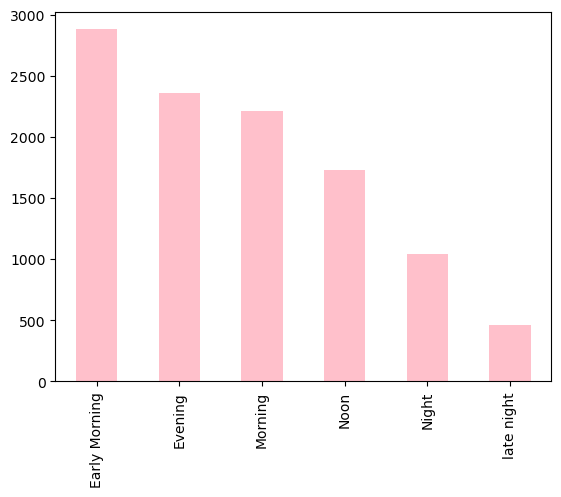

In [363]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar',color='pink')

In [364]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [365]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar",color="pink")

In [366]:
# standardizing the 'duration' column
def preprocess_duration(x):
    if 'h' not in x:
        x='0h'+' '+x
    elif 'm' not in x:
        x=x+' '+'0m'
    
    return x

In [367]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [368]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [369]:
'2h 50m'.split(' ')

['2h', '50m']

In [370]:
'2h 50m'.split(' ')[0]

'2h'

In [371]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [372]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [373]:
data['Duration_hour']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [374]:
data['Duration_minute']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [375]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


## Impact of Duration on price

In [376]:
data['Duration_total_mins']=data['Duration'].str.replace('h',"*60").str.replace(' ','+').str.replace("m","*1").apply(eval)

In [377]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [378]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_minute', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

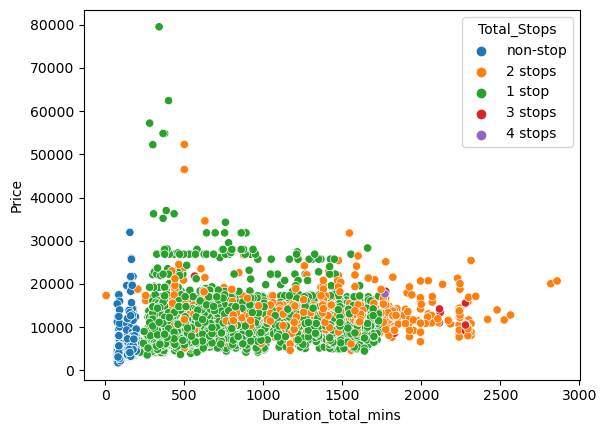

In [379]:
sns.scatterplot(x="Duration_total_mins",y="Price",hue="Total_Stops",data=data)

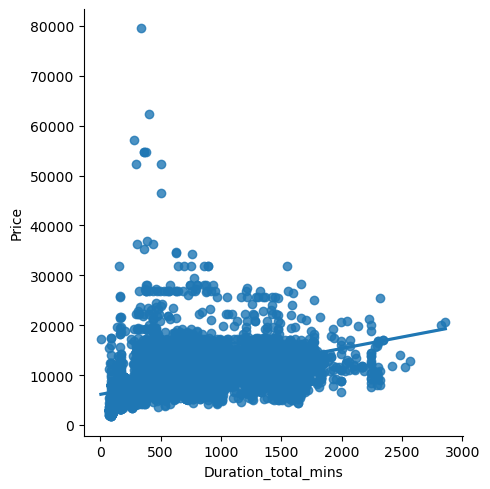

In [380]:
sns.lmplot(x="Duration_total_mins",y="Price",data=data)

## Bi-variate Analysis

## On which route Indigo is extremely used

In [381]:
data[data['Airline']=='IndiGo'].groupby('Route').size().sort_values(ascending=False)

Route
BLR → DEL                483
CCU → BLR                320
DEL → BOM → COK          302
DEL → HYD → COK          196
BOM → HYD                195
MAA → CCU                184
DEL → COK                 59
DEL → BLR → COK           57
CCU → MAA → BLR           37
DEL → MAA → COK           34
CCU → HYD → BLR           32
CCU → BBI → BLR           19
DEL → HYD → MAA → COK     18
BLR → HYD → DEL           18
DEL → LKO → COK           17
DEL → PNQ → COK           12
CCU → PNQ → BLR           11
CCU → PAT → BLR           10
CCU → NAG → BLR            9
BLR → IDR → DEL            5
DEL → BBI → COK            5
BLR → BOM → DEL            4
CCU → GAU → BLR            3
DEL → AMD → COK            3
BLR → NAG → DEL            3
BLR → LKO → DEL            3
BLR → AMD → DEL            3
DEL → TRV → COK            2
BLR → STV → DEL            2
BLR → GOI → DEL            1
CCU → VTZ → BLR            1
BOM → GOI → HYD            1
CCU → IXA → BLR            1
CCU → BOM → BLR            1
BLR → MA

## Airline vs Price Analysis

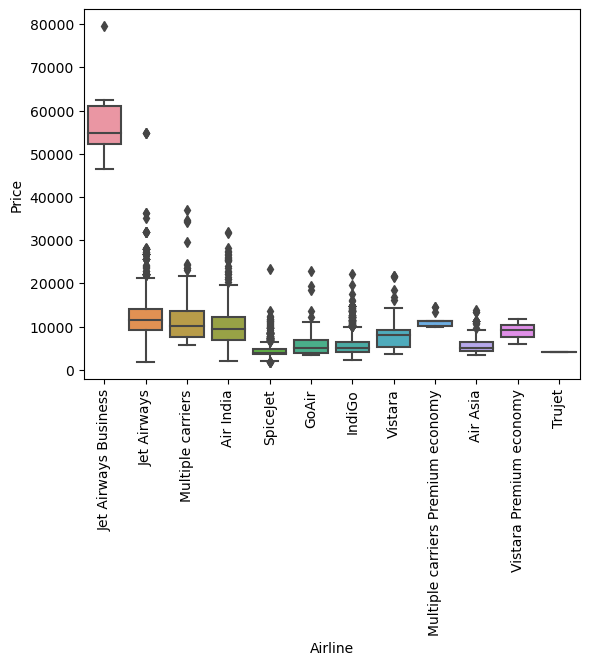

In [382]:
sns.boxplot(x='Airline',y="Price", data=data.sort_values('Price', ascending=False))
plt.xticks(rotation='vertical')
plt.show()

## Feature Engineering

In [383]:
# Source-> Nominal data -> One-hot Encoding
# Ordinal data-> Label Encoding

In [384]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [385]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

In [386]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [387]:
num_col

['Date_of_Journey',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_minute',
 'Duration_total_mins']

In [388]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [389]:
data['Source'].apply(lambda x:1 if x=="Bangalore" else 0)

0        0
1        0
2        0
3        0
4        0
        ..
10678    0
10679    0
10680    0
10681    0
10682    0
Name: Source, Length: 10682, dtype: int64

## One-hot-encoding

In [390]:
#Manual One-hot encoding
for sub_category in data['Source'].unique():
    data['Source_'+sub_category]=data['Source'].apply(lambda x:1 if x==sub_category else 0)

In [391]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


In [392]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [393]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [394]:
dict_airlines={key:index for index,key in enumerate(airlines, 0)}

In [395]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [396]:
data['Airline']=data['Airline'].map(dict_airlines)

In [397]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

## Target Guided encoding

In [398]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [399]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [400]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [401]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [402]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [403]:
dest_dict={index:key for key, index in enumerate(dest, 0)}

In [404]:
dest_dict

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [405]:
data['Destination']=data['Destination'].map(dest_dict)

In [406]:
data['Destination'].map(dest_dict)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10678   NaN
10679   NaN
10680   NaN
10681   NaN
10682   NaN
Name: Destination, Length: 10682, dtype: float64

In [407]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [408]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


## Label Encoding (Ordinal data)

In [409]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [410]:
stop={'non-stop':0,'2 stops':2, '1 stop':1, '3 stops': 3, '4 stops':4}

In [411]:
data['Total_Stops']=data['Total_Stops'].map(stop)

In [412]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


## Removing unnecessary features

In [413]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_minute', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [414]:
data['Additional_Info'].value_counts()/len(data)*100

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [415]:
data['Journey_year'].unique()

array([2019])

In [416]:
data.drop(columns=['Date_of_Journey','Additional_Info', 'Duration_total_mins','Source','Journey_year' ], axis=1, inplace=True)

In [417]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_minute', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [418]:
data.drop(columns=['Route'], axis=1, inplace=True)

In [419]:
data.drop(columns=['Duration'], axis=1, inplace=True)

In [420]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


## Outlier Detection

In [421]:
def plot(df, col):
    fig, (ax1, ax2, ax3)=plt.subplots(3,1)
    
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)

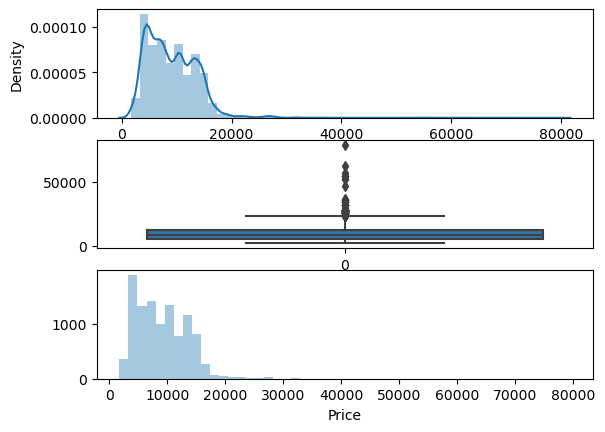

In [422]:
plot(data,'Price')

In [423]:
q3=data['Price'].quantile(0.75)
q1=data['Price'].quantile(0.25)
iqr=q3-q1
maximum=q3+1.5*iqr
minimum=q1-1.5*iqr

In [424]:
maximum

23017.0

In [425]:
minimum

-5367.0

In [426]:
print([price for price in data['Price'] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [427]:
len([price for price in data['Price'] if price>maximum or price<minimum])

94

In [428]:
data['Price']=np.where(data['Price']>35000, data['Price'].median(), data['Price'])

## Feature Selection

In [429]:
X=data.drop(['Price'], axis=1)

In [430]:
y=data['Price']

In [431]:
from sklearn.feature_selection import mutual_info_regression

In [432]:
imp=mutual_info_regression(X,y)

In [433]:
imp

array([0.96835099, 1.00818192, 0.78669434, 0.17626076, 0.24255226,
       0.34612129, 0.25149276, 0.40328988, 0.35101045, 0.4670844 ,
       0.34683512, 0.38443683, 0.45791313, 0.528604  , 0.13050753,
       0.2007394 ])

In [434]:
imp_df=pd.DataFrame(imp, index=X.columns)

In [435]:
imp_df.columns=['importance']

In [436]:
imp_df

,importance
Airline,0.968351
Destination,1.008182
Total_Stops,0.786694
Journey_day,0.176261
Journey_month,0.242552
Dep_Time_hour,0.346121
Dep_Time_minute,0.251493
Arrival_Time_hour,0.403290
Arrival_Time_minute,0.351010
Duration_hour,0.467084


In [437]:
imp_df.sort_values(by='importance', ascending=False)

,importance
Destination,1.008182
Airline,0.968351
Total_Stops,0.786694
Source_Delhi,0.528604
Duration_hour,0.467084
Source_Kolkata,0.457913
Arrival_Time_hour,0.403290
Source_Banglore,0.384437
Arrival_Time_minute,0.351010
Duration_minute,0.346835


## Model building

In [438]:
from sklearn.model_selection import train_test_split

In [443]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [462]:
from sklearn.ensemble import RandomForestRegressor

### RandomForest Regressor

In [445]:
ml_model=RandomForestRegressor()

In [446]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [447]:
y_pred=ml_model.predict(X_test)

In [448]:
y_pred

array([16635.73666667,  6542.85      ,  8820.26      , ...,
        3556.12      ,  6185.25      ,  7026.41      ])

In [449]:
from sklearn import metrics

In [450]:
metrics.r2_score(y_test, y_pred)

0.808240807687788

In [ ]:
### Defining Evaluation Metrics

In [454]:
# Mean Absolute Percentage Error
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [455]:
mape(y_test, y_pred)

13.241054700911056

### Automating ML pipelines

In [468]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are : {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test, y_prediction)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction))))
    print('MAPE : {}'.format(mape(y_test,y_prediction)))
    sns.distplot(y_test - y_prediction)

Training Score : 0.9514839773320021
predictions are : [16645.17  6604.7   8778.09 ...  3508.68  6319.7   6865.74]


r2 score : 0.8093019862630952
MAE : 1177.6757021949722
MSE : 3712432.5884227604
RMSE : 1926.7673934397894
MAPE : 13.213039638145553


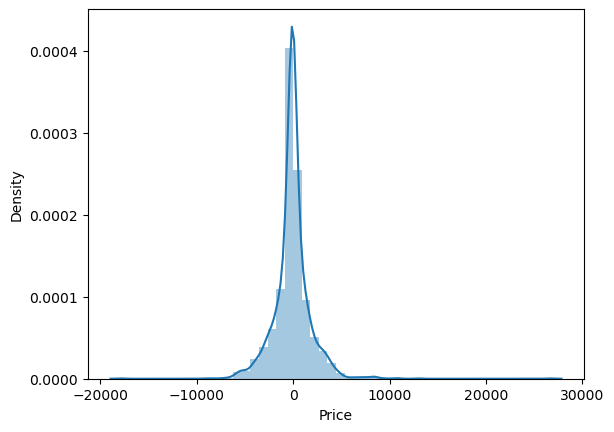

In [469]:
predict(RandomForestRegressor())

In [470]:
from sklearn.tree import DecisionTreeRegressor

Training Score : 0.9664600803077188
predictions are : [16840.  6976.  8610. ...  3419.  5797.  6818.]


r2 score : 0.6957466336711986
MAE : 1366.8579807812307
MSE : 5923082.732548567
RMSE : 2433.7384273065513
MAPE : 15.051606456964063


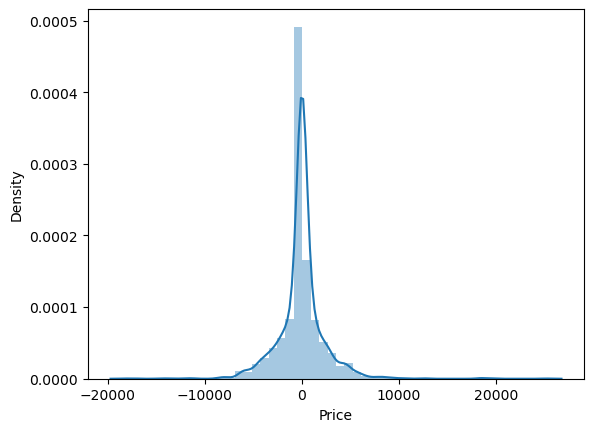

In [471]:
predict(DecisionTreeRegressor())

## Hypertuning ML model

In [472]:
from sklearn.model_selection import RandomizedSearchCV

In [483]:
reg_rf=RandomForestRegressor()

In [474]:
np.linspace(start=100, stop=1200, num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [477]:
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=6)]

max_features = ["auto","sqrt"]

max_depth=[int(x) for x in np.linspace(start=-5, stop=30, num=4)]
min_samples_split=[5,10,15,100]

In [478]:
random_grid={
    'n_estimators' : n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [479]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [-5, 6, 18, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [484]:
rf_random=RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, n_jobs=-1, verbose=2)

In [485]:
rf_random

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [-5, 6, 18, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [486]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [-5, 6, 18, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [487]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 30}

In [488]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=540)

In [489]:
rf_random.best_score_

0.8104386965245821

[CV] END max_depth=6, max_features=sqrt, min_samples_split=5, n_estimators=980; total time=   2.1s
[CV] END max_depth=6, max_features=auto, min_samples_split=15, n_estimators=540; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_split=15, n_estimators=540; total time=   0.0s
[CV] END max_depth=-5, max_features=sqrt, min_samples_split=15, n_estimators=760; total time=   0.0s
[CV] END max_depth=-5, max_features=sqrt, min_samples_split=15, n_estimators=760; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_split=100, n_estimators=1200; total time=   0.0s
[CV] END max_depth=-5, max_features=auto, min_samples_split=5, n_estimators=540; total time=   0.0s
[CV] END max_depth=-5, max_features=auto, min_samples_split=5, n_estimators=540; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_split=5, n_estimators=980; total time=   2.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=540; total time=   1.